In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path1=os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [2]:
path=path1+'/Mod_Data.csv'
data=pd.read_csv(path)
data.dropna(inplace=True)
print(data.shape)
#print(np.count_nonzero(data['price'], axis=0))
#print(data['price'].shape)
#data.dropna(inplace=True)
print(data.shape)
print(data['last_review'].dtype)

data['last_review']=data['last_review'].astype('datetime64[ns]')
data['month_of_review']=pd.DatetimeIndex(data['last_review']).month
data['year_of_review']=pd.DatetimeIndex(data['last_review']).year

(27230, 18)
(27230, 18)
object


In [3]:
X_enc_rt = pd.get_dummies(data.room_type, prefix='Roomtype')
X_enc_nh = pd.get_dummies(data.neighbourhood_group, prefix='NBG')
X_enc_ng = pd.get_dummies(data.neighbourhood, prefix='NB')
X_enc_hname=pd.get_dummies(data.host_name,prefix='HName')

In [4]:
Var = pd.concat([data, X_enc_rt,X_enc_nh,X_enc_ng], axis=1)
#Var = data
#print('Var columns ',Var.shape)
#print('Data columns ',data.shape)
Var.shape

(27230, 245)

In [5]:
D1=Var[(Var['price'] > 0)]
#D2=D1.iloc[:,7:26]
n1=np.log(D1['price'])
n2=np.log(D1['Distance in m'])
D1['price new']=n1
D1['Distance new']=n2
D1.head()

<ipython-input-5-f9b8bb865974>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['price new']=n1
<ipython-input-5-f9b8bb865974>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['Distance new']=n2


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,NB_Westerleigh,NB_Whitestone,NB_Williamsbridge,NB_Williamsburg,NB_Windsor Terrace,NB_Woodhaven,NB_Woodlawn,NB_Woodside,price new,Distance new
0,0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,...,0,0,0,0,0,0,0,0,4.787492,8.169504
2,2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,...,0,0,0,0,0,0,0,0,5.298317,8.195852
4,4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,...,0,0,0,0,0,0,0,0,4.744932,7.564448
5,5,9944426,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,...,0,0,0,0,0,0,0,0,5.416100,8.384940
6,6,19786915,Spacious Clean Studio Apartment,86892032,Marian,Queens,Rosedale,40.65766,-73.72838,Entire home/apt,...,0,0,0,0,0,0,0,0,4.094345,9.424361


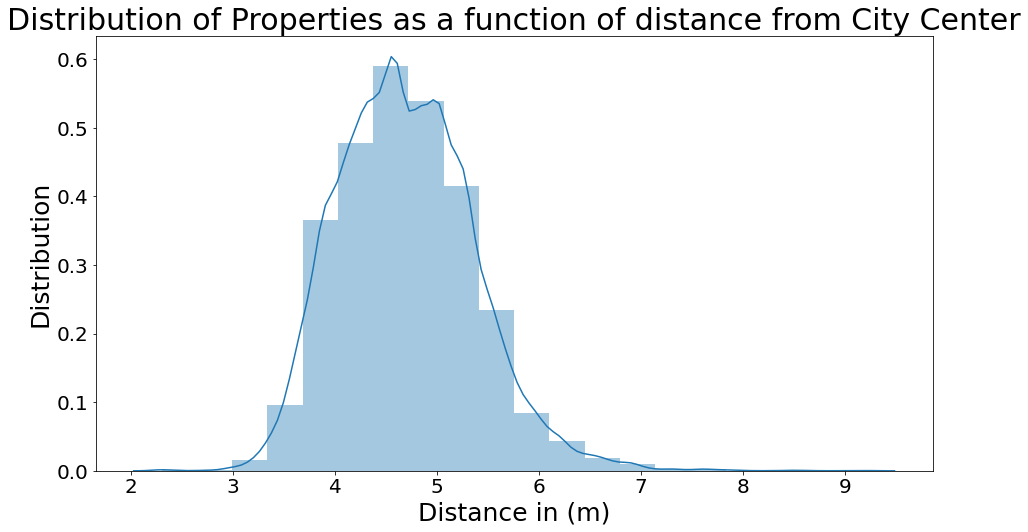

In [6]:
figure =plt.figure(figsize=(15,8))
sns.distplot(D1['price new'],bins=20)
plt.title('Distribution of Properties as a function of distance from City Center', fontsize=30)
plt.xlabel('Distance in (m)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [12]:
D2=D1[(D1['price new'] >=2. )&(D1['price new'] <= 5.8)]
D2.dropna(inplace=True)
D2.shape
#D2=D1

<ipython-input-12-4e3578fcf858>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D2.dropna(inplace=True)


(25827, 247)

In [8]:
#from sklearn.preprocessing import MinMaxScaler

#Y1=D2[['Distance in m']].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#D_scaled=min_max_scaler.fit_transform(Y1)
#D_normalized=pd.DataFrame(D_scaled)
#D_normalized
#D2['D_norm']=D_normalized


In [9]:
from sklearn.preprocessing import MinMaxScaler

X=D2.drop(['price new','name','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','last_review','reviews_per_month','calculated_host_listings_count','Distance new','availability_365'],axis=1)
#X=D2.drop(['Distance in m','price new','name','host_name','neighbourhood_group','neighbourhood','room_type','price','last_review','reviews_per_month','number_of_reviews'],axis=1)

#Y1=D2[['price new']].values.astype(float)
#min_max_scaler=preprocessing.MinMaxScaler()
#Y_scaled=min_max_scaler.fit_transform(Y1)
#Y=pd.DataFrame(Y_scaled)
#D2_normalized
Y=D2['price new']
#X.isnull().count()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=60)
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.6007868230504613

In [11]:
import math
from sklearn.metrics import mean_squared_error
y_pred=sklr.predict(X_test)
reg_model_mse=mean_squared_error(y_pred,y_test)
print(math.sqrt(reg_model_mse))

0.35995419967893133
